In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../db"))

['.ipynb_checkpoints', 'cell2cellholdout.csv', 'cell2celltrain.csv', 'Untitled.ipynb']


In [5]:
train = pd.read_csv("cell2celltrain.csv")
test = pd.read_csv("cell2cellholdout.csv")

In [6]:
train.info()
train[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,...,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,...,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,...,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,No,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,...,0,5,No,1,30,No,3-Good,Other,Professional,No


In [7]:
#Churn : Yes:1 , No:0
Churn = {'Yes': 1,'No': 0} 
  
# traversing through dataframe 
# values where key matches 
train.Churn = [Churn[item] for item in train.Churn] 
print(train)

       CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
0         3000002      1           24.00           219.0   
1         3000010      1           16.99            10.0   
2         3000014      0           38.00             8.0   
3         3000022      0           82.28          1312.0   
4         3000026      1           17.14             0.0   
...           ...    ...             ...             ...   
51042     3399958      1             NaN             NaN   
51043     3399974      0           95.17          1745.0   
51044     3399978      1             NaN             NaN   
51045     3399990      0             NaN             NaN   
51046     3399994      0             NaN             NaN   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
0                      22.0                   0.25             0.0   
1                      17.0                   0.00             0.0   
2                      38.0                   0.00             0.0   

In [8]:
# Handling missing data

print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: True
Any missing sample in test set: True 



In [9]:
# Here we handling missing value filled by zero rather than dropping NA values. 

# for column
#train['MonthlyRevenue'].fillna((train['MonthlyRevenue'].median()), inplace=True)
# for column
train['MonthlyRevenue'] = train['MonthlyRevenue'].replace(np.nan, 0)

# for whole dataframe
train = train.replace(np.nan, 0)

# inplace
train.replace(np.nan, 0, inplace=True)

print(train)

       CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
0         3000002      1           24.00           219.0   
1         3000010      1           16.99            10.0   
2         3000014      0           38.00             8.0   
3         3000022      0           82.28          1312.0   
4         3000026      1           17.14             0.0   
...           ...    ...             ...             ...   
51042     3399958      1            0.00             0.0   
51043     3399974      0           95.17          1745.0   
51044     3399978      1            0.00             0.0   
51045     3399990      0            0.00             0.0   
51046     3399994      0            0.00             0.0   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
0                      22.0                   0.25             0.0   
1                      17.0                   0.00             0.0   
2                      38.0                   0.00             0.0   

In [10]:
# for column
#train['MonthlyMinutes'].fillna((train['MonthlyMinutes'].median()), inplace=True)
train['MonthlyMinutes'] = train['MonthlyMinutes'].replace(np.nan, 0)

# for whole dataframe
train = train.replace(np.nan, 0)

# inplace
train.replace(np.nan, 0, inplace=True)

print(train)

       CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
0         3000002      1           24.00           219.0   
1         3000010      1           16.99            10.0   
2         3000014      0           38.00             8.0   
3         3000022      0           82.28          1312.0   
4         3000026      1           17.14             0.0   
...           ...    ...             ...             ...   
51042     3399958      1            0.00             0.0   
51043     3399974      0           95.17          1745.0   
51044     3399978      1            0.00             0.0   
51045     3399990      0            0.00             0.0   
51046     3399994      0            0.00             0.0   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
0                      22.0                   0.25             0.0   
1                      17.0                   0.00             0.0   
2                      38.0                   0.00             0.0   

In [11]:
# for column
#train['TotalRecurringCharge'].fillna((train['TotalRecurringCharge'].median()), inplace=True)
train['TotalRecurringCharge'] = train['TotalRecurringCharge'].replace(np.nan, 0)

# for whole dataframe
train = train.replace(np.nan, 0)

# inplace
train.replace(np.nan, 0, inplace=True)

print(train)

       CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
0         3000002      1           24.00           219.0   
1         3000010      1           16.99            10.0   
2         3000014      0           38.00             8.0   
3         3000022      0           82.28          1312.0   
4         3000026      1           17.14             0.0   
...           ...    ...             ...             ...   
51042     3399958      1            0.00             0.0   
51043     3399974      0           95.17          1745.0   
51044     3399978      1            0.00             0.0   
51045     3399990      0            0.00             0.0   
51046     3399994      0            0.00             0.0   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
0                      22.0                   0.25             0.0   
1                      17.0                   0.00             0.0   
2                      38.0                   0.00             0.0   

In [12]:
# for column
#train['DirectorAssistedCalls'].fillna((train['DirectorAssistedCalls'].median()), inplace=True)
train['DirectorAssistedCalls'] = train['DirectorAssistedCalls'].replace(np.nan, 0)

# for whole dataframe
train = train.replace(np.nan, 0)

# inplace
train.replace(np.nan, 0, inplace=True)

print(train)

       CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
0         3000002      1           24.00           219.0   
1         3000010      1           16.99            10.0   
2         3000014      0           38.00             8.0   
3         3000022      0           82.28          1312.0   
4         3000026      1           17.14             0.0   
...           ...    ...             ...             ...   
51042     3399958      1            0.00             0.0   
51043     3399974      0           95.17          1745.0   
51044     3399978      1            0.00             0.0   
51045     3399990      0            0.00             0.0   
51046     3399994      0            0.00             0.0   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
0                      22.0                   0.25             0.0   
1                      17.0                   0.00             0.0   
2                      38.0                   0.00             0.0   

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [14]:
train = FunLabelEncoder(train)
train.info()
train.iloc[235:300,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
235,3001782,1,64.80,479.0,50.0,0.00,139.0,0.0,-337.0,-13.3,...,0,3,0,0,8,0,0,2,4,2
236,3001786,1,17.14,3.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,0,0,15,0,0,2,3,2
237,3001790,0,124.06,2955.0,82.0,0.00,421.0,0.0,262.0,20.0,...,0,0,0,1,14,0,0,2,3,1
238,3001794,0,80.28,1245.0,68.0,1.24,73.0,0.0,-160.0,-62.1,...,0,6,0,3,0,0,2,0,4,2
239,3001802,0,100.05,820.0,85.0,3.46,0.0,17.5,2.0,-16.1,...,0,8,0,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3002250,1,95.30,894.0,52.0,2.48,30.0,28.4,146.0,-10.0,...,0,0,0,0,3,0,2,0,3,1
296,3002258,0,104.29,1005.0,105.0,0.99,2.0,3.7,-145.0,1.9,...,0,0,0,0,8,0,0,0,3,1
297,3002262,0,95.27,815.0,95.0,1.49,0.0,0.0,-350.0,-7.0,...,0,5,0,0,0,0,0,0,3,1
298,3002270,0,79.84,596.0,75.0,1.73,8.0,0.0,-38.0,-0.9,...,0,9,0,0,3,0,0,2,3,2


In [15]:
test = FunLabelEncoder(test)
test.info()
test.iloc[235:300,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
235,3004718,NaN,33.10,242.0,40.0,0.00,0.0,0.0,-110.0,-2.7,...,0,4,0,0,8,0,0,2,1,2
236,3004722,NaN,64.69,370.0,40.0,0.25,98.0,0.0,8.0,0.1,...,1,0,0,1,8,0,0,3,3,1
237,3004738,NaN,100.56,660.0,50.0,3.46,151.0,0.0,-390.0,-47.6,...,0,6,0,0,3,0,2,0,3,0
238,3004746,NaN,35.17,308.0,30.0,0.00,14.0,0.0,42.0,10.9,...,1,0,0,1,15,0,0,2,3,2
239,3004762,NaN,30.25,268.0,30.0,0.25,0.0,0.0,48.0,-0.2,...,0,6,0,0,3,0,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3005682,NaN,81.49,741.0,75.0,5.69,0.0,0.8,185.0,-1.5,...,0,0,0,0,14,0,0,2,3,1
296,3005710,NaN,30.00,204.0,30.0,0.00,0.0,0.0,43.0,0.0,...,0,0,0,0,8,0,0,0,3,1
297,3005750,NaN,51.21,312.0,35.0,0.25,37.0,0.0,-149.0,-13.0,...,0,6,0,0,2,0,2,0,3,1
298,3005766,NaN,35.72,94.0,30.0,3.46,0.0,0.0,-40.0,-2.8,...,0,7,0,1,8,0,0,2,3,0


In [16]:
test = test.drop(columns=['Churn'],axis=1)
test = test.dropna(how='any')
print(test.shape)

(19533, 57)


In [17]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Churn"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Churn,
0,36336
1,14711


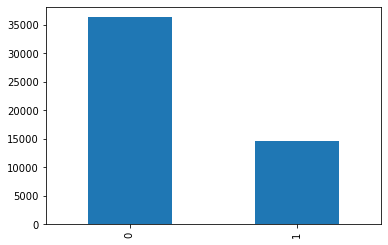

In [18]:
# Distribution of Churn
train.Churn.value_counts()[0:30].plot(kind='bar')
plt.show()

<AxesSubplot:>

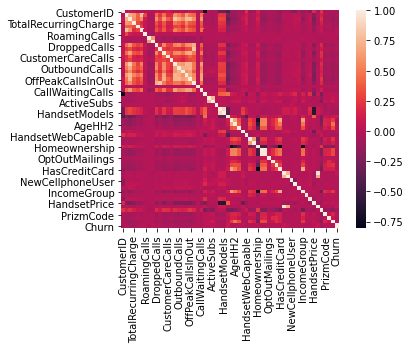

In [19]:
#Plotting heatmap

train = train[['CustomerID','MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes',
         'RoamingCalls','PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls',
         'ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls'
         ,'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','ServiceArea','Handsets','HandsetModels',              
'CurrentEquipmentDays','AgeHH1','AgeHH2','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings',          
'NonUSTravel','OwnsComputer','HasCreditCard','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser',          
'NotNewCellphoneUser','ReferralsMadeBySubscriber','IncomeGroup','OwnsMotorcycle','AdjustmentsToCreditRating', 
'HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus','Churn']] #Subsetting the data
cor = train.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [20]:
from sklearn.model_selection import train_test_split
Y = train['Churn']
X = train.drop(columns=['Churn'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [21]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (35732, 57)
Y train shape:  (35732,)
X test shape:  (15315, 57)
Y test shape:  (15315,)


In [22]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

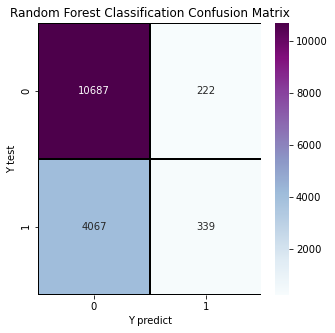

In [23]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [24]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.7199477636304277


In [25]:
# Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

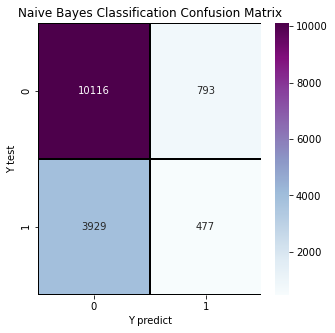

In [26]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [27]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.6916748285994123


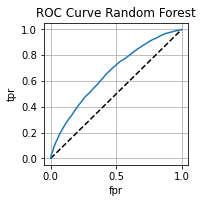

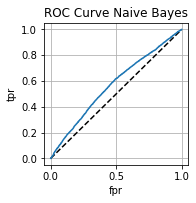

In [28]:
# ROC Curve

from sklearn.metrics import roc_curve
# Random Forest Classification
Y_predict5_proba = rfcla.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict5_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

# Naive Bayes Classification
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict3_proba)
plt.subplot(332)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()